In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [13]:
data = pd.read_csv('pset2.csv')

In [425]:
pd.set_option("max_columns", 50)
pd.options.mode.chained_assignment = None

In [51]:

data['law'] = data['primary'] + (data['secondary']*2)

In [390]:
years = data.pivot(index = 'year', columns = ['state'], values = ['primary'])

years = years.transpose()

def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if type(cell_value) in [float, int]:
        if cell_value  == 1:
            return highlight
    return default

years.style.applymap(even_number_background)

#years.head(50)



In [62]:
years_sec = data.pivot(index = 'year', columns = ['state'], values = ['law'])
years_sec = years_sec.transpose()

def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    red    = 'background-color: blue;'
    default = ''
    

    if type(cell_value) in [float, int]:
        if cell_value  == 1:
            return highlight
        if cell_value ==2:
            return red
        
    return default

years_sec.style.applymap(even_number_background)

#years.head(50)


(array([ 19.,  35.,  75., 167., 255., 282., 200.,  56.,  14.,   1.]),
 array([-9.68820981, -9.47235876, -9.25650772, -9.04065667, -8.82480563,
        -8.60895458, -8.39310354, -8.17725249, -7.96140145, -7.7455504 ,
        -7.52969936]),
 <BarContainer object of 10 artists>)

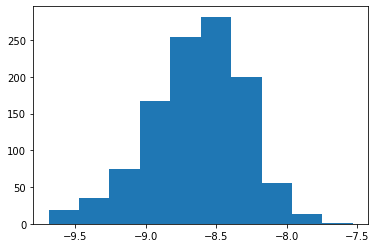

In [202]:
data['log_fatal_per_cap'] = np.log(data['fatalities']/(data['population']*1000))
plt.hist(data['log_fatal_per_cap'])

(array([ 86., 285., 331., 246., 108.,  33.,  10.,   4.,   0.,   1.]),
 array([0.06201032, 0.10949925, 0.15698818, 0.20447712, 0.25196605,
        0.29945498, 0.34694392, 0.39443285, 0.44192178, 0.48941072,
        0.53689965]),
 <BarContainer object of 10 artists>)

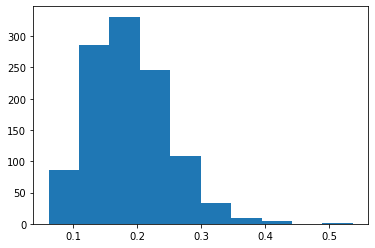

In [203]:
data['fatal_per_cap_1000'] = data['fatalities']/data['population']
plt.hist(data['fatal_per_cap_1000'])

(array([484., 366., 155.,  26.,  12.,  22.,  17.,  10.,   4.,   8.]),
 array([  63. ,  607.1, 1151.2, 1695.3, 2239.4, 2783.5, 3327.6, 3871.7,
        4415.8, 4959.9, 5504. ]),
 <BarContainer object of 10 artists>)

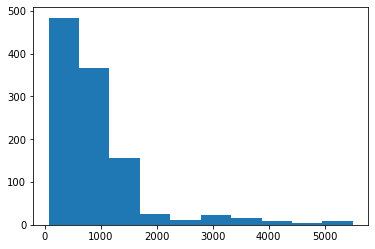

In [204]:
plt.hist(data['fatalities'])

(array([ 36.,  93.,  74., 112., 156., 256., 192., 112.,  38.,  35.]),
 array([4.14313473, 4.59014429, 5.03715386, 5.48416342, 5.93117299,
        6.37818255, 6.82519212, 7.27220168, 7.71921125, 8.16622081,
        8.61323038]),
 <BarContainer object of 10 artists>)

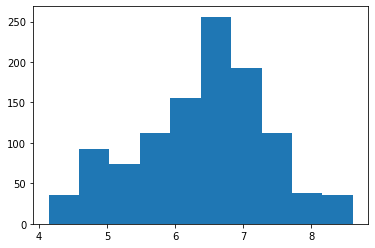

In [205]:
plt.hist(np.log(data['fatalities']))

In [426]:
data['years_post_prim'] = data['year']
df = pd.DataFrame(columns = data.columns)
data['never_treat'] = 0
n = 0
for s in sorted(list(set(list(data['state'])))):
    x = 0
    dat = data[data['state']==s]
    for y in list(set(list(data['year']))):
        if dat.iloc[22]['primary']== 0:
            dat['years_post_prim'] = dat['years_post_prim'] - 2004
            #print(dat['years_post_prim'])
            df = df.append(dat)
            break
        if dat.iloc[x]['primary']==1:
            dat['years_post_prim'] = dat['years_post_prim'] - y
            dat['never_treat'] = 1
            df = df.append(dat)
            break
        x = x+1
        n = n+1
            
#print(df)     

In [427]:
df['means'] = df['years_post_prim']


for y in list(set(list(df['years_post_prim']))):
    df['means'] = df['means'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 1)]['log_fatal_per_cap'].mean())
    
df['means_nopol'] = df['years_post_prim']

for y in list(set(list(df['years_post_prim']))):
    df['means_nopol'] = df['means_nopol'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 0)]['log_fatal_per_cap'].mean())
    

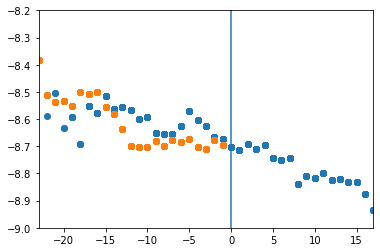

In [428]:
plt.axvline(x = 0)
plt.xlim(right=17)
plt.xlim(left=-23)
plt.ylim(-9, -8.2)
plt.scatter(df[df['never_treat']==1]['years_post_prim'], df[df['never_treat']==1]['means'])
plt.scatter(df[df['never_treat']==0]['years_post_prim'], df[df['never_treat']==0]['means_nopol'])


In [429]:
df['sums'] = df['years_post_prim']


for y in list(set(list(df['years_post_prim']))):
    df['sums'] = df['sums'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 1)]['log_fatal_per_cap'].median())
    
df['sums_nopol'] = df['years_post_prim']

for y in list(set(list(df['years_post_prim']))):
    df['sums_nopol'] = df['sums_nopol'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 0)]['log_fatal_per_cap'].median())
    

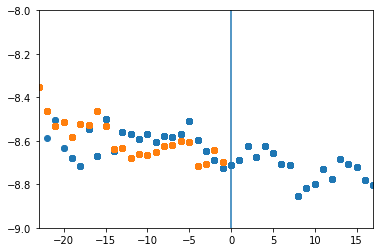

In [430]:
plt.axvline(x = 0)
plt.xlim(right=17)
plt.xlim(left=-23)
plt.ylim(-9, -8)
plt.scatter(df[df['never_treat']==1]['years_post_prim'], df[df['never_treat']==1]['sums'])
plt.scatter(df[df['never_treat']==0]['years_post_prim'], df[df['never_treat']==0]['sums_nopol'])


In [431]:
y = ['log_fatal_per_cap_1000']
x = ['primary', 'secondary']
df['primary'] = df['primary'].astype(int)
df['secondary'] = df['secondary'].astype(int)

vals = sm.OLS(df[y], sm.add_constant(df[x]))
out = vals.fit()
print(out.summary())

                              OLS Regression Results                              
Dep. Variable:     log_fatal_per_cap_1000   R-squared:                       0.063
Model:                                OLS   Adj. R-squared:                  0.061
Method:                     Least Squares   F-statistic:                     37.02
Date:                    Sun, 29 Oct 2023   Prob (F-statistic):           2.77e-16
Time:                            13:19:14   Log-Likelihood:                -333.32
No. Observations:                    1104   AIC:                             672.6
Df Residuals:                        1101   BIC:                             687.7
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [432]:
data['years_post_sec'] = data['year']
df1 = pd.DataFrame(columns = data.columns)
data['never_treats'] = 0
n = 0
for s in sorted(list(set(list(data['state'])))):
    x = -1
    dat = data[data['state']==s]
    for y in list(set(list(data['year']))):
        x = x + 1
        if dat.iloc[x]['secondary']==1:
            #print(0)
            dat['years_post_sec'] = dat['years_post_sec'] - y
            dat['never_treats'] = 1
            df1 = df1.append(dat)
            break
        '''if (dat.iloc[22]['secondary']== 0) & (dat.iloc[22]['primary']== 1):
            print(1)
            dat['years_post_sec'] = dat['years_post_sec'] - y

            dat['never_treats'] = 1
            #print(dat['years_post_sec'])
            df1 = df1.append(dat)
            break'''
        if (dat.iloc[22]['secondary']== 0) & (dat.iloc[22]['primary']== 0):
            #print(2)
            dat['years_post_sec'] = dat['years_post_sec'] - 2004
            df1 = df1.append(dat)
            break
        
    
   

In [433]:
df1['meanss'] = df1['years_post_sec']

print(list(set(list(df1['years_post_sec']))))
for y in list(set(list(df1['years_post_sec']))):
    df1['meanss'] = df1['meanss'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 1)]['log_fatal_per_cap'].mean())
    
df1['meanss_nopol'] = df1['years_post_sec']

for y in list(set(list(df1['years_post_sec']))):
    df1['meanss_nopol'] = df1['meanss_nopol'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 0)]['log_fatal_per_cap'].mean())
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


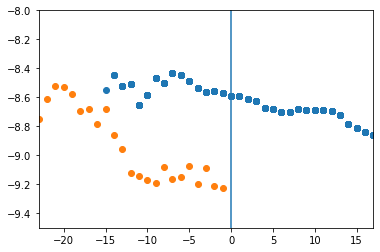

In [434]:
plt.axvline(x = 0)
plt.xlim(right=17)
plt.xlim(left=-23)
plt.ylim(-9.5, -8)
plt.scatter(df1[df1['never_treats']==1]['years_post_sec'], df1[df1['never_treats']==1]['meanss'])
plt.scatter(df1[df1['never_treats']==0]['years_post_sec'], df1[df1['never_treats']==0]['meanss_nopol'])


In [435]:
df1['sumss'] = df1['years_post_sec']


for y in list(set(list(df1['years_post_sec']))):
    df1['sumss'] = df1['sumss'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 1)]['log_fatal_per_cap'].median())
    
df1['sumss_nopol'] = df1['years_post_sec']

for y in list(set(list(df1['years_post_sec']))):
    df1['sumss_nopol'] = df1['sumss_nopol'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 0)]['log_fatal_per_cap'].median())
    

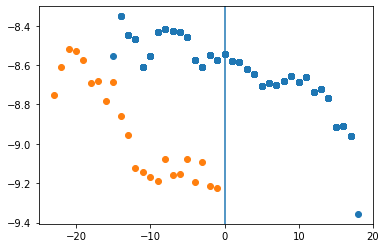

In [436]:
plt.axvline(x = 0)
plt.scatter(df1[df1['never_treats']==1]['years_post_sec'], df1[df1['never_treats']==1]['sumss'])
plt.scatter(df1[df1['never_treats']==0]['years_post_sec'], df1[df1['never_treats']==0]['sumss_nopol'])


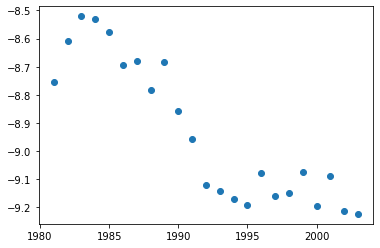

In [437]:
plt.scatter(data[data['state']=='NH']['year'], data[data['state']=='NH']['log_fatal_per_cap'])

In [438]:
orig = list(set(list(df['years_post_prim'])))
print(orig)
new = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(new))
df['post'] = df['years_post_prim'].replace(orig,new)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
43


In [439]:
df['pres_fatal'] = df['year']

for y in list(set(list(df['year']))):
    df['pres_fatal'] = df['pres_fatal'].replace(y, df[(df['post']==0) & (df['year']==y)]['log_fatal_per_cap'].mean())
    
df['post_fatal'] = df['year']

for y in list(set(list(df['year']))):
    df['post_fatal'] = df['post_fatal'].replace(y, df[(df['post']==1)  & (df['year']==y)]['log_fatal_per_cap'].mean())
    

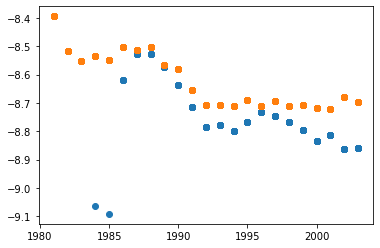

In [440]:
plt.scatter(df[df['post'] ==1]['year'], df[df['post'] ==1]['post_fatal'])

plt.scatter(df[df['post'] ==0]['year'], df[df['post'] ==0]['pres_fatal'])


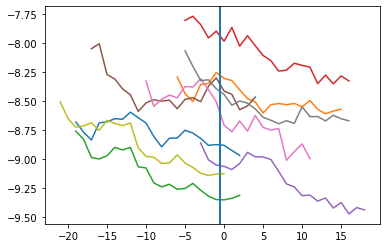

In [441]:
for i in range(10,20):
    ind = (i*23) - 1
    plt.axvline(x = -0.5)
    plt.plot(df[df['never_treat']==1].iloc[ind - 22:ind]['years_post_prim'], df[df['never_treat']==1].iloc[ind - 22:ind]['log_fatal_per_cap'])

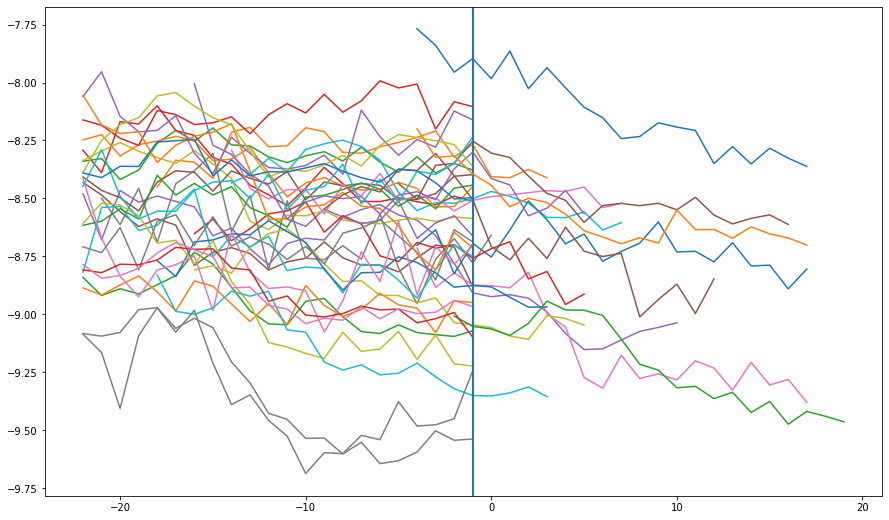

In [442]:
plt.figure(figsize=(15,9))
for i in range(0,42):
    ind = (i*23)
    plt.axvline(x = -1)
    plt.plot(df.iloc[ind - 22:ind]['years_post_prim'], df.iloc[ind - 22:ind]['log_fatal_per_cap'])
    
    

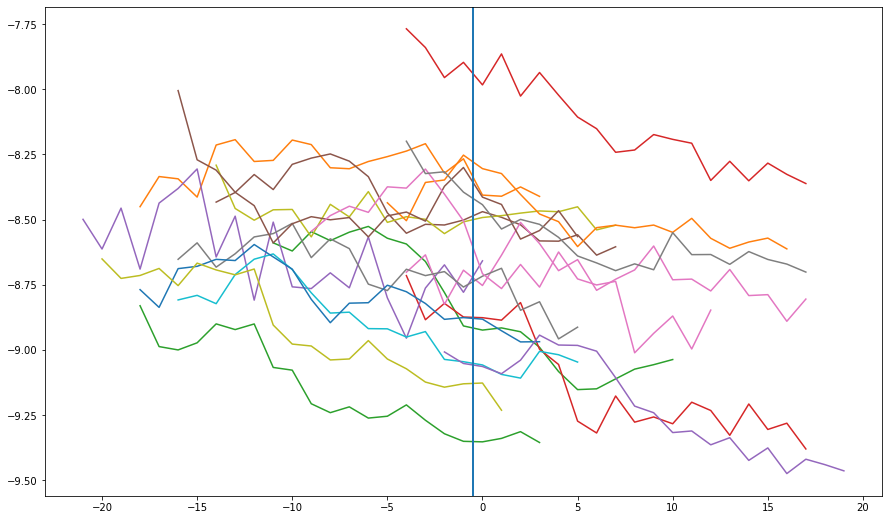

In [443]:
plt.figure(figsize=(15,9))
for i in range(0,42):
    ind = (i*23)
    plt.axvline(x = -0.5)
    plt.plot(df[df['never_treat']==1].iloc[ind - 22:ind]['years_post_prim'], df[df['never_treat']==1].iloc[ind - 22:ind]['log_fatal_per_cap'])
    
    

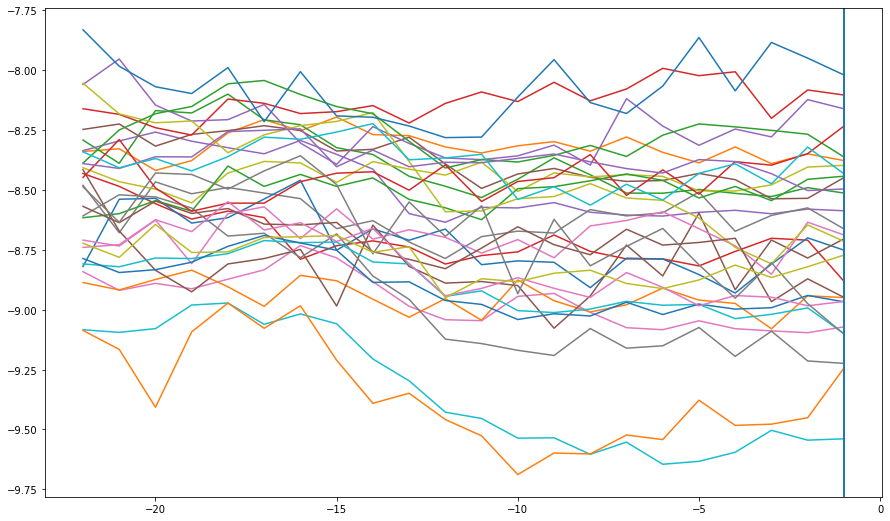

In [444]:
plt.figure(figsize=(15,9))
for i in range(0,42):
    ind = (i*23)
    plt.axvline(x = -1)
    plt.plot(df[df['never_treat']==0].iloc[ind - 22:ind]['years_post_prim'], df[df['never_treat']==0].iloc[ind - 22:ind]['log_fatal_per_cap'])
    
    

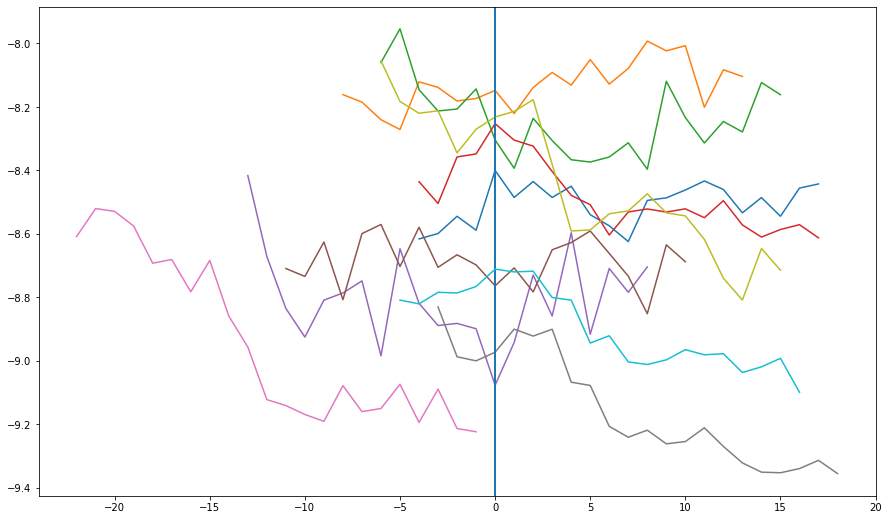

In [445]:
plt.figure(figsize=(15,9))

for i in range(20,30):
    ind = (i*23)
    plt.axvline(x = 0)
    plt.plot(df1.iloc[ind - 22:ind]['years_post_sec'], df1.iloc[ind - 22:ind]['log_fatal_per_cap'])
    
    